In [2]:
import pandas as pd
import numpy as np


In [3]:
# Correct full path to your CSV file
data_path = r"C:\Users\PatnamSaiHarshitha\Desktop\BankChurnPrediction\data\Bank Customer Churn Prediction.csv"

# Load the CSV
df = pd.read_csv(data_path)

# Check data
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check for missing values
print(df.isnull().sum())


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [5]:
#Data Cleaning & Preprocessing
#Step 1: Drop Irrelevant Columns
#customer_id is just an identifier, not useful for prediction.
df = df.drop('customer_id', axis=1)
df.head()


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Step 2: Encode Categorical Variables

#Convert country and gender into numeric using one-hot encoding:
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)
df.head()



,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [7]:
#convert booleans explicitly to 0/1
bool_cols = ['country_Germany', 'country_Spain', 'gender_Male']
df[bool_cols] = df[bool_cols].astype(int)
df.head()


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
import pandas as pd


In [9]:
X = df.drop('churn', axis=1)
y = df['churn']

# Train-test split 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (8000, 11)
Test set: (2000, 11)


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Recall (churn):", recall_score(y_test, y_pred_dt))
#model is overall correct 78% of the time, but it misses almost half of churned customers.

#This is common with Decision Trees when the classes are imbalanced (fewer churners than non-churners).

Decision Tree Accuracy: 0.783
Decision Tree Recall (churn): 0.5110565110565111


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Recall (churn):", recall_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8645
Random Forest Recall (churn): 0.4619164619164619


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

# Step 1: Train Random Forest with class_weight='balanced'
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # This improves recall for churned class
)
rf.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred_rf = rf.predict(X_test)

# Step 3: Evaluate
accuracy = accuracy_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy)
print("Random Forest Recall (churn):", recall)


Random Forest Accuracy: 0.8605
Random Forest Recall (churn): 0.4398034398034398


In [13]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Fit on training set
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train Random Forest on resampled data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_smote = rf_smote.predict(X_test)

# Evaluate
accuracy_smote = accuracy_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)

print("Random Forest (SMOTE) Accuracy:", accuracy_smote)
print("Random Forest (SMOTE) Recall (churn):", recall_smote)


Random Forest (SMOTE) Accuracy: 0.817
Random Forest (SMOTE) Recall (churn): 0.6461916461916462


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score
import numpy as np


In [15]:
# Use X_train_res, y_train_res from SMOTE step
gb = GradientBoostingClassifier(
    n_estimators=300,       # more trees
    learning_rate=0.05,     # smaller learning rate for better performance
    max_depth=3,            # default, can tune later
    random_state=42
)

gb.fit(X_train_res, y_train_res)


,loss,'log_loss'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [16]:
# Predict probabilities
y_prob_gb = gb.predict_proba(X_test)[:,1]


In [17]:
# Default threshold = 0.5
threshold = 0.4 # lower threshold to increase recall
y_pred_gb_thresh = np.where(y_prob_gb >= threshold, 1, 0)

# Evaluate
accuracy_gb = accuracy_score(y_test, y_pred_gb_thresh)
recall_gb = recall_score(y_test, y_pred_gb_thresh)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Recall (churn):", recall_gb)


Gradient Boosting Accuracy: 0.763
Gradient Boosting Recall (churn): 0.7567567567567568


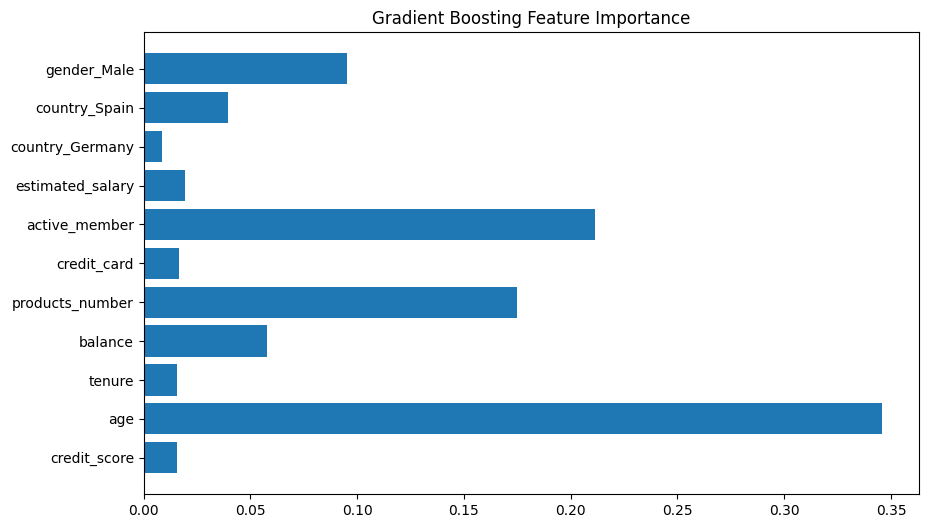

In [18]:
import matplotlib.pyplot as plt

importances = gb.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title("Gradient Boosting Feature Importance")
plt.show()


In [19]:
df['churn_probability'] = gb.predict_proba(X)[:,1]

top_risk = df.sort_values('churn_probability', ascending=False).head(20)
top_risk[['credit_score','age','balance','products_number','churn_probability']]


,credit_score,age,balance,products_number,churn_probability
1657,704,54,133656.91,3,0.995801
70,738,58,133745.44,4,0.995715
2614,546,58,106458.31,4,0.995687
6255,547,55,111362.76,3,0.995127
8923,625,55,118772.71,4,0.995017
6911,705,54,125889.30,3,0.994961
4013,720,57,162082.31,4,0.994840
2495,466,56,111920.13,3,0.994779
4563,705,64,153469.26,3,0.994416
4054,602,56,115895.22,3,0.994035


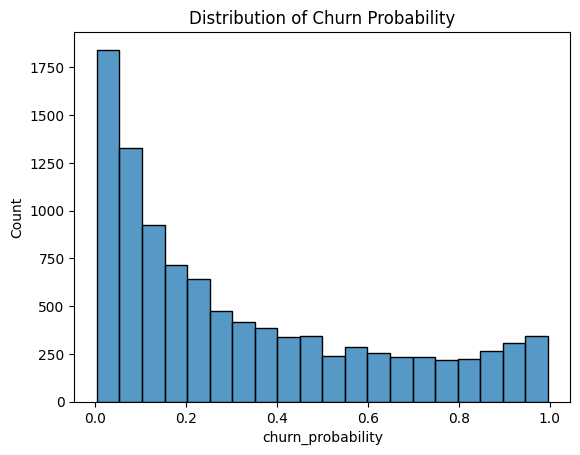

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['churn_probability'], bins=20)
plt.title("Distribution of Churn Probability")
plt.show()


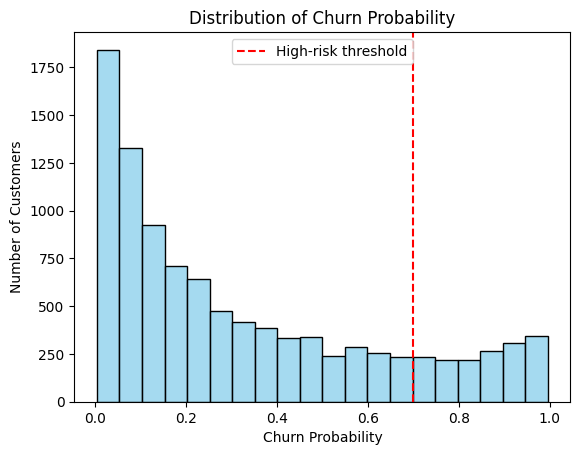

In [21]:
sns.histplot(df['churn_probability'], bins=20, color='skyblue')
plt.axvline(0.7, color='red', linestyle='--', label='High-risk threshold')
plt.title("Distribution of Churn Probability")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

Top 20 High-Risk Customers:


,credit_score,age,balance,products_number,churn_probability
1657,704,54,133656.91,3,0.995801
70,738,58,133745.44,4,0.995715
2614,546,58,106458.31,4,0.995687
6255,547,55,111362.76,3,0.995127
8923,625,55,118772.71,4,0.995017
6911,705,54,125889.30,3,0.994961
4013,720,57,162082.31,4,0.994840
2495,466,56,111920.13,3,0.994779
4563,705,64,153469.26,3,0.994416
4054,602,56,115895.22,3,0.994035


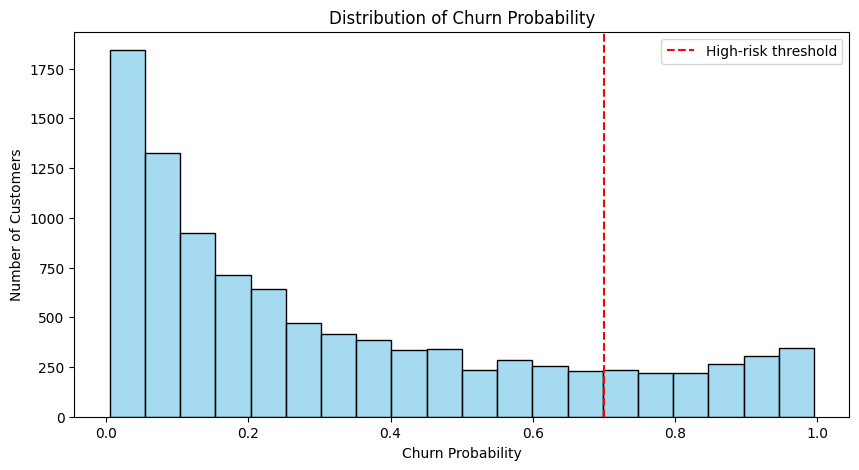

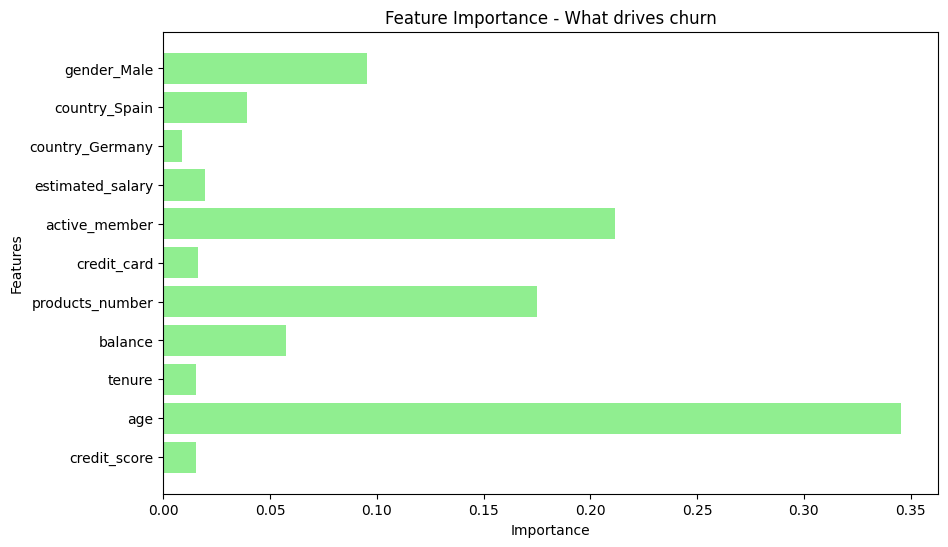

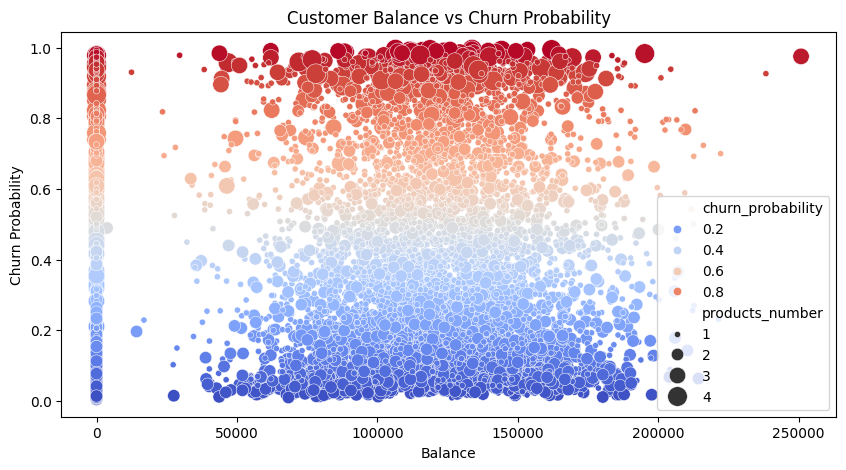

In [26]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df already has:
# - X features
# - 'churn_probability' column from Gradient Boosting model

# -----------------------------
# 1️⃣ Top 20 High-Risk Customers
# -----------------------------
top_risk = df.sort_values('churn_probability', ascending=False).head(20)
print("Top 20 High-Risk Customers:")
display(top_risk[['credit_score','age','balance','products_number','churn_probability']])

# -----------------------------
# 2️⃣ Histogram of Churn Probability
# -----------------------------
plt.figure(figsize=(10,5))
sns.histplot(df['churn_probability'], bins=20, color='skyblue')
plt.axvline(0.7, color='red', linestyle='--', label='High-risk threshold')
plt.title("Distribution of Churn Probability")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

# -----------------------------
# 3️⃣ Feature Importance (Gradient Boosting)
# -----------------------------
importances = gb.feature_importances_  # assuming your Gradient Boosting model is gb
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances, color='lightgreen')
plt.title("Feature Importance - What drives churn")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# -----------------------------
# 4️⃣ Optional: Scatter plot - Balance vs Churn Probability
# -----------------------------
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['balance'], y=df['churn_probability'], hue=df['churn_probability'], palette='coolwarm', size=df['products_number'], sizes=(20,200))
plt.title("Customer Balance vs Churn Probability")
plt.xlabel("Balance")
plt.ylabel("Churn Probability")
plt.show()


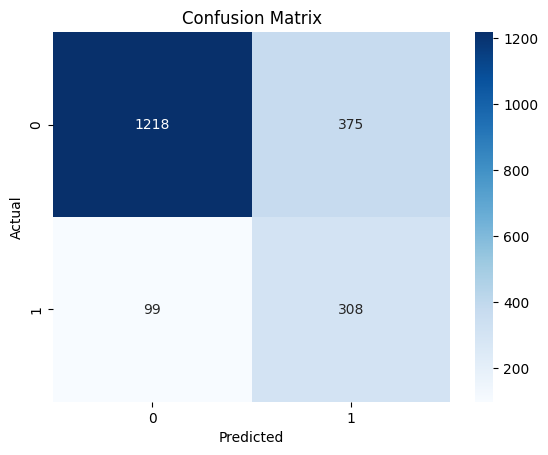

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, np.where(gb.predict_proba(X_test)[:,1]>=0.4,1,0))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [29]:
import joblib
import os

# Make sure "models" folder exists
os.makedirs("models", exist_ok=True)

# Save Gradient Boosting model
joblib.dump(gb, "models/gradient_boosting_churn.pkl")

# Save feature columns to ensure consistent predictions later
joblib.dump(X.columns.tolist(), "models/feature_columns.pkl")


['models/feature_columns.pkl']

In [33]:
import os

# Make sure "reports" folder exists
os.makedirs("reports", exist_ok=True)
print(os.listdir("reports"))


# Export top-risk customers
top_risk.to_csv("reports/top_20_high_risk_customers.csv", index=False)


['top_20_high_risk_customers.csv']


In [35]:
# Save plots
plt.figure(figsize=(10,5))
sns.histplot(df['churn_probability'], bins=20, color='skyblue')
plt.axvline(0.7, color='red', linestyle='--', label='High-risk threshold')
plt.title("Distribution of Churn Probability")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.legend()
plt.savefig("reports/churn_probability_histogram.png")
plt.close()

plt.figure(figsize=(10,6))
plt.barh(features, importances, color='lightgreen')
plt.title("Feature Importance - What drives churn")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.savefig("reports/feature_importance.png")
plt.close()

plt.figure(figsize=(10,5))
sns.scatterplot(x=df['balance'], y=df['churn_probability'], hue=df['churn_probability'], palette='coolwarm', size=df['products_number'], sizes=(20,200))
plt.title("Customer Balance vs Churn Probability")
plt.xlabel("Balance")
plt.ylabel("Churn Probability")
plt.savefig("reports/balance_vs_churn.png")
plt.close()


In [36]:
pip install xgboost imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [37]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import recall_score
import numpy as np

# Define pipeline with SMOTE + XGBoost
pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Hyperparameter space
param_dist = {
    'clf__n_estimators': [100, 300, 500],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__subsample': [0.7, 0.9, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0]
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Search for best model (optimize recall)
rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='recall',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit on training data
rs.fit(X_train, y_train)

# Best model
best = rs.best_estimator_

# Predictions on test
y_prob = best.predict_proba(X_test)[:,1]
y_pred = (y_prob >= 0.5).astype(int)

# Evaluation
from sklearn.metrics import accuracy_score, recall_score
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("XGBoost Recall (churn):", recall_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\PatnamSaiHarshitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [21:24:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.802
XGBoost Recall (churn): 0.6732186732186732


In [38]:
best_recall = 0
best_thresh = 0.5
for t in np.linspace(0.2, 0.7, 51):
    rec = recall_score(y_test, (y_prob >= t).astype(int))
    if rec > best_recall:
        best_recall, best_thresh = rec, t

print("Best Recall:", best_recall)
print("Best Threshold:", best_thresh)

# Evaluate with best threshold
y_pred_best = (y_prob >= best_thresh).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))


Best Recall: 0.9385749385749386
Best Threshold: 0.2
Accuracy: 0.561
Recall: 0.9385749385749386


In [39]:
from sklearn.metrics import classification_report, roc_auc_score


In [40]:
# If you used Gradient Boosting
y_pred = gb.predict(X_test)           # predicted labels
y_prob = gb.predict_proba(X_test)[:,1]  # predicted probabilities

# Or if you used XGBoost
# y_pred = xgb_model.predict(X_test)
# y_prob = xgb_model.predict_proba(X_test)[:,1]



In [42]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)


              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1593
           1       0.52      0.68      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.73      2000
weighted avg       0.83      0.81      0.82      2000

ROC-AUC Score: 0.8509449356906984


In [43]:
import joblib
joblib.dump(gb, "models/gradient_boosting_churn.pkl")


['models/gradient_boosting_churn.pkl']

In [44]:
print(os.listdir("reports"))


['balance_vs_churn.png', 'churn_probability_histogram.png', 'feature_importance.png', 'top_20_high_risk_customers.csv']
